In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
data_train=pd.read_csv('train.csv')

In [4]:
data_test=pd.read_csv('test.csv')

In [5]:
sample=pd.read_csv('submission.csv')

In [6]:
data_train.shape

(19237, 18)

In [7]:
cat=[]
num=[]
for i in data_train.columns:
    if data_train[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)
        
print('The numerical data are {}'.format(num))
print('The categorical data are {}'.format(cat))

The numerical data are ['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']
The categorical data are ['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [8]:
data_train['Prod. year']=data_train['Prod. year'].astype(object)

In [9]:
data_train['Mileage']=data_train['Mileage'].str.replace('km',' ')

In [10]:
data_train['Mileage']=data_train['Mileage'].astype(int)

In [11]:
data_train['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [12]:
data_train['Doors']=data_train['Doors'].replace({'04-May':4,'02-Mar':2})

In [13]:
data_train['Doors']=data_train['Doors'].astype(str)

In [14]:
data_train['Levy']=data_train['Levy'].replace({'-':np.nan})

In [15]:
data_train['Levy']=data_train['Levy'].astype(float)

In [16]:
data_train['Cylinders'].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

In [17]:
data_train['Cylinders']=data_train['Cylinders'].astype(str)

In [18]:
data_train=data_train.drop(columns=['Manufacturer','Model','ID'])

In [19]:
data_train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [20]:
data_train['Additional_features']=data_train['Engine volume'].replace(['2.0 Turbo', '2.2 Turbo','3.0 Turbo','1.4 Turbo','1.5 Turbo', '1.6 Turbo','2.3 Turbo','2.8 Turbo','1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '3.2 Turbo','1.3 Turbo','2.5 Turbo','1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.2 Turbo','4.8 Turbo', '4.6 Turbo','1.2 Turbo','1.7 Turbo', '6.3 Turbo', '2.7 Turbo','2.9 Turbo', '4.0 Turbo','3.6 Turbo','3.7 Turbo','5.5 Turbo','2.1 Turbo','0.7 Turbo', '0.6 Turbo','1.0 Turbo', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo','5.7 Turbo','0.4 Turbo', '5.4 Turbo', '0.3 Turbo','1.1 Turbo'],'Turbo')

In [21]:
data_train['Additional_features']=data_train['Additional_features'].replace(['3.5','3','1.3','2.5','2','1.8','2.4','4','1.6','3.3','4.7','1.5','4.4','3.6','2.3','2.2','1.4','5.5','3.2','3.8','4.6','1.2','5', '1.7', '2.9', '0.5','1.9','2.7','4.8','5.3','0.4','2.8','1.1','2.1','0.7','5.4','3.7','1','2.6','5.7','3.4','4.3','4.2','5.9','6.8','4.5','0.6','7.3','0.1','6.3','6.4','5.2','5.8','0.8', '6.7', '6.2', '0', '20', '0.3', '0.2','5.6', '6', '3.9', '0.9'],'Non-Turbo')

In [22]:
data_train['Additional_features'].unique()

array(['Non-Turbo', 'Turbo'], dtype=object)

In [23]:
data_train['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [24]:
data_train['Drive wheels']=data_train['Drive wheels'].replace({'4x4':'4-WD'})

In [25]:
data_train['Engine volume']=data_train['Engine volume'].str.replace('Turbo','')

In [26]:
data_train['Engine volume']=data_train['Engine volume'].astype(float)

In [27]:
data_train.isnull().sum()

Price                     0
Levy                   5819
Prod. year                0
Category                  0
Leather interior          0
Fuel type                 0
Engine volume             0
Mileage                   0
Cylinders                 0
Gear box type             0
Drive wheels              0
Doors                     0
Wheel                     0
Color                     0
Airbags                   0
Additional_features       0
dtype: int64

In [28]:
data_train['Levy']=data_train['Levy'].fillna(data_train['Levy'].mean())

In [29]:
df_feature=data_train.drop(columns='Price')

In [30]:
df_target=data_train['Price']

In [31]:
num_data=df_feature.select_dtypes(include=np.number)

In [32]:
cat_data=df_feature.select_dtypes(include=object)

In [33]:
num_data.head()

,Levy,Engine volume,Mileage,Airbags
0,1399.000000,3.5,186005,12
1,1018.000000,3.0,192000,8
2,906.838128,1.3,200000,2
3,862.000000,2.5,168966,0
4,446.000000,1.3,91901,4


In [34]:
cat_data.head()

,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Additional_features
0,2010,Jeep,Yes,Hybrid,6.0,Automatic,4-WD,4,Left wheel,Silver,Non-Turbo
1,2011,Jeep,No,Petrol,6.0,Tiptronic,4-WD,4,Left wheel,Black,Non-Turbo
2,2006,Hatchback,No,Petrol,4.0,Variator,Front,4,Right-hand drive,Black,Non-Turbo
3,2011,Jeep,Yes,Hybrid,4.0,Automatic,4-WD,4,Left wheel,White,Non-Turbo
4,2014,Hatchback,Yes,Petrol,4.0,Automatic,Front,4,Left wheel,Silver,Non-Turbo


In [35]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [36]:
oe=OrdinalEncoder()

In [37]:
cat_oe=oe.fit_transform(cat_data)

In [38]:
cat_df=pd.DataFrame(cat_oe,columns=cat_data.columns)

In [39]:
cat_df.head()

,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Additional_features
0,43.0,4.0,1.0,2.0,9.0,0.0,0.0,1.0,0.0,12.0,0.0
1,44.0,4.0,0.0,5.0,9.0,2.0,0.0,1.0,0.0,1.0,0.0
2,39.0,3.0,0.0,5.0,7.0,3.0,1.0,1.0,1.0,1.0,0.0
3,44.0,4.0,1.0,2.0,7.0,0.0,0.0,1.0,0.0,14.0,0.0
4,47.0,3.0,1.0,5.0,7.0,0.0,1.0,1.0,0.0,12.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [42]:
num_sc=sc.fit_transform(num_data)

In [43]:
num_df=pd.DataFrame(num_sc,columns=num_data.columns)

In [44]:
concat=pd.concat([num_df,cat_df],axis=1)

In [45]:
x=concat.copy()

In [46]:
y=df_target.copy()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [49]:
import statsmodels
import statsmodels.api

In [50]:
x_train.insert(loc=0,column='intercept',value=np.ones(x_train.shape[0]))

In [51]:
x_train.head()

,intercept,Levy,Engine volume,Mileage,Airbags,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Additional_features
14688,1.0,-1.487693e+00,-0.350873,-0.028819,-1.523737,47.0,9.0,1.0,2.0,7.0,0.0,1.0,1.0,0.0,12.0,0.0
558,1.0,5.894733e-16,1.585827,-0.029360,1.254005,46.0,1.0,1.0,5.0,9.0,1.0,2.0,0.0,0.0,1.0,0.0
3843,1.0,5.894733e-16,2.838986,-0.026491,0.328091,37.0,4.0,1.0,5.0,11.0,2.0,0.0,1.0,0.0,12.0,0.0
14118,1.0,-1.329549e+00,0.218745,-0.027950,1.254005,47.0,9.0,1.0,2.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
14834,1.0,2.700429e-01,-0.009102,-0.029569,-0.597823,49.0,4.0,1.0,5.0,7.0,0.0,1.0,1.0,0.0,7.0,0.0


In [52]:
mlr_model=statsmodels.api.OLS(np.log(y_train),x_train).fit()

In [53]:
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:22:14   Log-Likelihood:                -27790.
No. Observations:               15389   AIC:                         5.561e+04
Df Residuals:                   15373   BIC:                         5.573e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept               6.3631      0.174     36.640      0.000       6.023       6.703
Levy                   -0.0243      0.015     -1.589      0.112      -0.054       0.006
Engine volume           0.1604      0.020      7.846      0.000       0.120       0.200
Mileage                -0.0258      0.013     -1.985      0.047      -0.051      -0.000
Airbags                -0.3259      0.013    -25.139      0.000      -0.351      -0.301
Prod. year              0.0725      0.003     28.351      0.000       0.067       0.077
Category               -0.0130      0.005     -2.792      0.005      -0.022      -0.004
Leather interior       -0.1433      0.033     -4.402      0.000      -0.207      -0.080
Fuel type              -0.0254      0.007     -3.716      0.000      -0.039      -0.012
Cylinders              -0.0885      0.015     -6.011      0.000      -0.117      -0.060
Gear box type           0.4334      0.015     29.325      0.000       0.404       0.462
Drive wheels            0.1690      0.023      7.415      0.000       0.124       0.214
Doors                  -0.0293      0.059     -0.494      0.621      -0.145       0.087
Wheel                  -0.4760      0.050     -9.487      0.000      -0.574      -0.378
Color                   0.0024      0.002      1.069      0.285      -0.002       0.007
Additional_features     0.7119      0.042     17.068      0.000       0.630       0.794
==============================================================================
Omnibus:                     4151.150   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10331.774
Skew:                          -1.487   Prob(JB):                         0.00
Kurtosis:                       5.695   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
t_intercept=mlr_model.params[0]/mlr_model.bse[0]

In [55]:
t_slope=mlr_model.params[1]/mlr_model.bse[1]

In [56]:
t_intercept,t_slope

(36.64027042218189, -1.5886413535042703)

In [57]:
n=len(data_train)

In [58]:
from scipy import stats

In [59]:
pval_intercept=stats.t.sf(t_intercept,df=n-1)

In [60]:
pval_slope=stats.t.sf(t_slope,df=n-1)

In [61]:
pval_intercept,pval_slope

(1.786862720101014e-284, 0.9439210894326511)

In [62]:
# confidence interval for intercept

a=data_train.shape[0]
loc=mlr_model.params[0]
scale=mlr_model.bse[0]
interval_for_intercept=stats.t.interval(0.95,a-1,loc,scale)

In [63]:
# confidence interval for slope

b=data_train.shape[1]
loc=mlr_model.params[1]
scale=mlr_model.bse[1]
interval_for_slope=stats.t.interval(0.95,b-1,loc,scale)

In [64]:
interval_for_slope,interval_for_intercept

((-0.056810691139913855, 0.008289396518460584),
 (6.022699064628492, 6.703492243439095))

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif=pd.DataFrame()
vif['vif_factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns

In [67]:
for i in range(len(concat.columns)):
    vif=pd.DataFrame()
    vif['vif_factor']=[variance_inflation_factor(concat.values,i) for i in range(concat.shape[1])]
    vif['features']=concat.columns
    multi=vif[vif['vif_factor']>10]
    
    if multi.empty==False:
        df_sort=multi.sort_values(by='vif_factor',ascending=False)
    else:
        print(vif)
        break
        
    if df_sort.empty==False:
        concat=concat.drop(columns=df_sort['features'].iloc[0])
    else:
        print(vif)

    vif_factor             features
0     1.536276                 Levy
1     1.766324        Engine volume
2     1.001900              Mileage
3     1.100601              Airbags
4     5.625319             Category
5     3.650443     Leather interior
6     3.976847            Fuel type
7     1.597544        Gear box type
8     3.671730         Drive wheels
9     1.303014                Wheel
10    2.721164                Color
11    1.205648  Additional_features


In [68]:
from statsmodels.graphics.gofplots import qqplot

Skewness of the residuals:  -1.4874298088809288


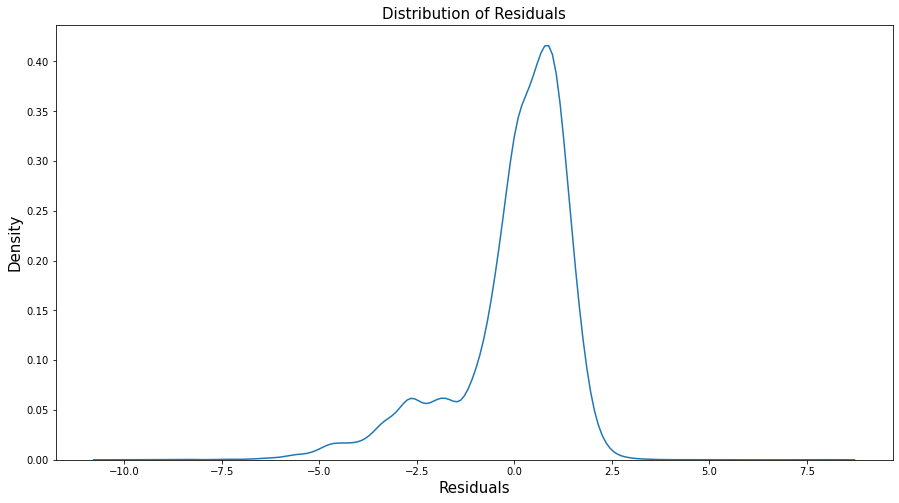

In [69]:
sns.distplot(mlr_model.resid,hist=False)

plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

print("Skewness of the residuals: ", mlr_model.resid.skew())

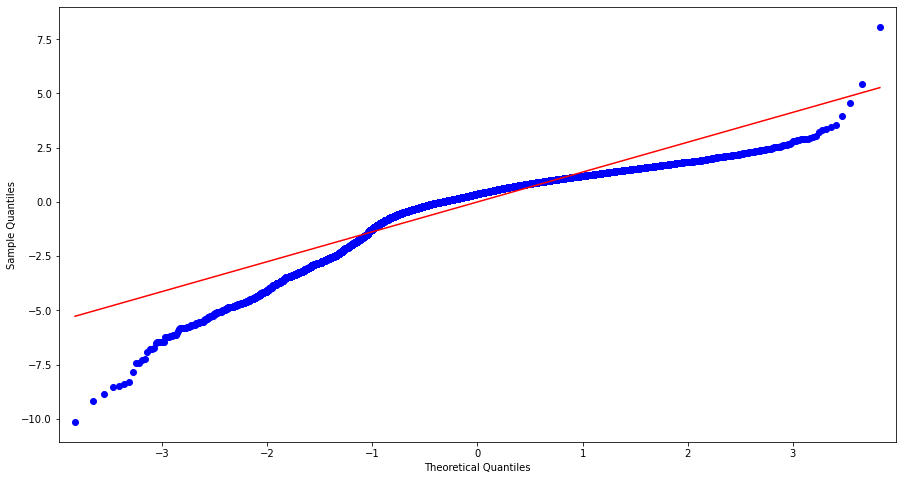

In [70]:
qqplot(mlr_model.resid,line='r')
plt.show()

In [71]:
new_train=x_train[['Levy','Engine volume','Mileage','Airbags','Category','Leather interior','Fuel type','Gear box type',
                   'Drive wheels','Wheel','Color','Additional_features']]

In [72]:
new_test=x_test[['Levy','Engine volume','Mileage','Airbags','Category','Leather interior','Fuel type','Gear box type',
                   'Drive wheels','Wheel','Color','Additional_features']]

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
linreg=LinearRegression()

In [197]:
linreg.fit(new_train,np.log(y_train))

LinearRegression()

In [198]:
y_pred_train=linreg.predict(new_train)

In [200]:
y_pred_train

array([9.2652289 , 9.01140165, 9.45812961, ..., 8.51630802, 9.21095376,
       8.45047817])

In [201]:
y_train

14688     7997
558      20385
3843     20542
14118    11133
14834    72268
         ...  
16840    16935
11863    40045
17093     5018
8366     60213
17530     4704
Name: Price, Length: 15389, dtype: int64

In [199]:
y_pred_test=linreg.predict(new_test)

In [179]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [79]:
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))

In [80]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))

In [81]:
mae_train=mean_absolute_error(y_train,y_pred_train)

In [82]:
mae_test=mean_absolute_error(y_test,y_pred_test)

In [83]:
rmse_train,rmse_test,mae_train,mae_test

(213713.57081332998, 25092.53336702672, 18845.633967735233, 17352.302290720807)

In [87]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [88]:
linreg_forward=SequentialFeatureSelector(estimator=linreg,k_features=(5,10),
                                        forward=True,cv=12,
                                        scoring='r2')

In [89]:
sfs_forward=linreg_forward.fit(new_train,y_train)

In [90]:
print('Feature Selection using forward selection are : ',sfs_forward.k_feature_names_)
print('R-Squared : ', sfs_forward.k_score_)

Feature Selection using forward selection are :  ('Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Wheel', 'Additional_features')
R-Squared :  0.04637881594899646


In [91]:
linreg_backward=SequentialFeatureSelector(estimator=linreg,k_features=(5,10),
                                         forward=False,cv=12,
                                         scoring='r2')

In [92]:
sfs_backward=linreg_backward.fit(new_train,y_train)

In [93]:
print('Feature Selection using backward selection are : ',sfs_backward.k_feature_names_)
print('R-Squared : ', sfs_backward.k_score_)

Feature Selection using backward selection are :  ('Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Wheel', 'Additional_features')
R-Squared :  0.04637881594899646


In [91]:
from sklearn.feature_selection import RFE

In [92]:
rfe=RFE(estimator=linreg,n_features_to_select=12)

In [93]:
rfe.fit(new_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [94]:
feat_index = pd.Series(data = rfe.ranking_, index = new_train.columns)

In [95]:
signi_feat_rfe = feat_index[feat_index==1].index

In [96]:
signi_feat_rfe

Index(['Levy', 'Engine volume', 'Mileage', 'Airbags', 'Category',
       'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels',
       'Wheel', 'Color', 'Additional_features'],
      dtype='object')

In [97]:
from sklearn.model_selection import KFold,LeaveOneOut,cross_val_score

In [98]:
kf=KFold(n_splits=5)

In [99]:
def get_score(model,x_train_k,x_test_k,y_train_k,y_test_k):
    model.fit(x_train_k,y_train_k)
    x=model.score(x_train_k,y_train_k)
    return x

In [100]:
scores=[]
for i,j in kf.split(new_train):
    x_train_k,x_test_k,y_train_k,y_test_k=new_train.iloc[i],new_train.iloc[j],y_train.iloc[i],y_train.iloc[j]
    s=get_score(linreg,x_train_k,x_test_k,y_train_k,y_test_k)
    scores.append(s)

In [101]:
print('All Scores',scores,sep='\n')
print('Maximum Scores obtained : ',max(scores),sep='\n')
print('Minimum Scores obtained : ',min(scores),sep='\n')
print('Average Scores obtained : ',np.mean(scores),sep='\n')

All Scores
[0.10015377381649215, 0.001627296202285966, 0.0015904222448630545, 0.001670677651214869, 0.0016265275445521699]
Maximum Scores obtained : 
0.10015377381649215
Minimum Scores obtained : 
0.0015904222448630545
Average Scores obtained : 
0.021333739491881644


In [102]:
loocv=LeaveOneOut()

In [103]:
loocv_rmse=[]
for i,j in loocv.split(new_train):
    x_train_l,x_test_l,y_train_l,y_test_l=new_train.iloc[i],new_train.iloc[j],y_train.iloc[i],y_train.iloc[j]
    linreg.fit(x_train_l,y_train_l)
    y_l=linreg.predict(x_test_l)
    rmse=np.sqrt(mean_squared_error(y_test_l,y_l))
    loocv_rmse.append(rmse)

In [104]:
print('All Scores',loocv_rmse,sep='\n')
print('Maximum Scores obtained : ',max(loocv_rmse),sep='\n')
print('Minimum Scores obtained : ',min(loocv_rmse),sep='\n')
print('Average Scores obtained : ',np.mean(loocv_rmse),sep='\n')

All Scores
[8985.715700582114, 5566.700645391007, 5188.41179574536, 297.4179342954558, 50925.777544653916, 7971.815887598805, 3352.5019168670187, 16280.419963923581, 407.5910329792023, 24553.701666998288, 15935.38819662937, 5606.984862346315, 10009.144470899544, 55022.84732557877, 21389.820599974195, 1685.527942232853, 18172.28608647745, 26243.35938041289, 7046.419273512838, 2398.521710239809, 10267.417866644024, 18111.981519400295, 7068.698040666517, 5622.103444813307, 47.148469905907405, 30523.484525709384, 2054.6571966801566, 4528.8436208108615, 571.1216667982917, 3897.418973473279, 7968.0216719986165, 1405.7049872924981, 17659.77494054495, 20797.5621501789, 5773.619003605887, 4719.348493937534, 10492.500044822089, 8036.305867237268, 16987.9252041624, 12805.64564837335, 28576.40866608961, 25813.589449761002, 70234.20160075388, 1862.0775884663599, 25935.55196372744, 23825.688687475777, 15404.0365727311, 16160.101540215335, 1608.6421342741014, 23896.7346912219, 6835.162522302038, 1849

In [105]:
submission_df=data_train[['Levy','Engine volume','Mileage','Airbags','Category','Leather interior','Fuel type','Gear box type',
                   'Drive wheels','Wheel','Color','Additional_features']]

In [106]:
submission_df.to_csv('C:/Users/welcome/Excel Documents/Car Price Data/sample_sub.csv',index=False)

# Models

In [103]:
x_train = x_train.drop(['intercept'],axis=1)

In [ ]:
x_train = x_train.drop(['intercept'],axis=1)

In [183]:
x_train.head()

,Levy,Engine volume,Mileage,Airbags,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Additional_features
14688,-1.487693e+00,-0.350873,-0.028819,-1.523737,47.0,9.0,1.0,2.0,7.0,0.0,1.0,1.0,0.0,12.0,0.0
558,5.894733e-16,1.585827,-0.029360,1.254005,46.0,1.0,1.0,5.0,9.0,1.0,2.0,0.0,0.0,1.0,0.0
3843,5.894733e-16,2.838986,-0.026491,0.328091,37.0,4.0,1.0,5.0,11.0,2.0,0.0,1.0,0.0,12.0,0.0
14118,-1.329549e+00,0.218745,-0.027950,1.254005,47.0,9.0,1.0,2.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
14834,2.700429e-01,-0.009102,-0.029569,-0.597823,49.0,4.0,1.0,5.0,7.0,0.0,1.0,1.0,0.0,7.0,0.0


In [150]:
y_train.head()

14688     7997
558      20385
3843     20542
14118    11133
14834    72268
Name: Price, dtype: int64

In [151]:
x_test.head()

,Levy,Engine volume,Mileage,Airbags,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Additional_features
18718,-1.162442e-01,0.218745,-0.027193,0.791048,44.0,9.0,0.0,5.0,7.0,2.0,1.0,1.0,0.0,11.0,0.0
3207,-1.070296e+00,-1.262261,-0.031168,-0.597823,48.0,3.0,1.0,5.0,7.0,0.0,1.0,1.0,0.0,2.0,0.0
12838,5.894733e-16,2.383292,-0.026863,0.328091,34.0,4.0,1.0,0.0,11.0,2.0,0.0,2.0,0.0,1.0,0.0
16686,-3.988301e-01,0.104821,-0.029074,0.791048,45.0,9.0,0.0,2.0,7.0,3.0,1.0,1.0,0.0,12.0,0.0
7332,-3.677198e-01,-0.350873,-0.027160,0.328091,48.0,3.0,0.0,5.0,7.0,0.0,1.0,1.0,0.0,14.0,0.0


In [152]:
y_test.head()

18718    18189
3207     23935
12838    17249
16686    13172
7332     13172
Name: Price, dtype: int64

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Linear Regression

In [234]:
lr=LinearRegression()
lr.fit(x_train,np.log(y_train))
lr.predict(x_test)

array([9.50250835, 9.07706791, 8.74560665, ..., 8.06318273, 8.63239169,
       8.73050575])

In [235]:
y_pred = lr.predict(x_test)
print("R2 score:",metrics.r2_score(np.log(y_test), y_pred))
print("Mean squared error:",metrics.mean_squared_error(np.log(y_test), y_pred))
# print("Mean absolute error:",metrics.mean_absolute_error(np.log(y_test), y_pred))

R2 score: 0.13891492338669043
Mean squared error: 2.183416906679907


# Ridge

In [236]:
from sklearn.linear_model import Ridge,Lasso

In [237]:
pipe = Pipeline([('classifier',Ridge())])
grid_param = [{"classifier__alpha": [0.1,0.5,1,100],
               "classifier__solver":['auto', 'svd', 'cholesky'],
               "classifier__fit_intercept":[True,False]}]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=3,n_jobs=-1)
best_model = gridsearch.fit(x_train,np.log(y_train))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [238]:
gridsearch.best_estimator_

Pipeline(steps=[('classifier', Ridge(alpha=1, solver='svd'))])

In [239]:
best_model.predict(x_test)

array([9.50244975, 9.07707638, 8.7456928 , ..., 8.06332213, 8.6328108 ,
       8.73056118])

In [240]:
y_pred = best_model.predict(x_test)
print("R2 score:",metrics.r2_score(np.log(y_test), y_pred))
print("Mean squared error:",metrics.mean_squared_error(np.log(y_test), y_pred))

R2 score: 0.13891459633682368
Mean squared error: 2.1834177359663824


# Lasso

In [241]:
pipe = Pipeline([('classifier',Lasso())])
grid_param = [{"classifier__alpha": [0,0.01,0.1,0.5,1],
               "classifier__selection":['cyclic', 'random'],
               "classifier__fit_intercept":[True,False]}]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=3,n_jobs=-1)
best_model = gridsearch.fit(x_train,np.log(y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [242]:
gridsearch.best_estimator_

Pipeline(steps=[('classifier', Lasso(alpha=0))])

In [243]:
y_pred = best_model.predict(x_test)
print("R2 score:",metrics.r2_score(np.log(y_test), y_pred))
print("Mean squared error:",metrics.mean_squared_error(np.log(y_test), y_pred))

R2 score: 0.13891492338669043
Mean squared error: 2.183416906679907


In [245]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(random_state=0)
gradboost.fit(x_train,np.log(y_train))
gradboost.predict(x_test)


y_pred = gradboost.predict(x_test)
print("R2 score:",metrics.r2_score(np.log(y_test), y_pred))
print("Mean squared error:",metrics.mean_squared_error(np.log(y_test), y_pred))
# print("Mean absolute error:",metrics.mean_absolute_error(np.log(y_test), y_pred))

R2 score: 0.4484212935675598
Mean squared error: 1.3986147312248147


In [247]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(x_train,np.log(y_train))
rf.predict(x_test)


y_pred = rf.predict(x_test)
print("R2 score:",metrics.r2_score(np.log(y_test), y_pred))
print("Mean squared error:",metrics.mean_squared_error(np.log(y_test), y_pred))
# print("Mean absolute error:",metrics.mean_absolute_error(np.log(y_test), y_pred))

R2 score: 0.6032895014001315
Mean squared error: 1.00592198520861
